### Imports 

In [1]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpf

### API Setup & Intial imports

In [2]:
api_key = 'aMyy0OST1DsuGMAH50lu5JqpxodFNaS9HE6GbJbRHceUiQfiDPnseGPhPiQBUQGn'
secret_key = 'rEkqzAnNcldu1SrnDeM0xXwafiUfbYqktZWM5oPfRdqlgS5ew3XCAHElISZBgVDn'

In [3]:
client = Client(api_key, secret_key)

In [4]:
tickers = client.get_all_tickers()
tickers[:10]

[{'symbol': 'ETHBTC', 'price': '0.06761500'},
 {'symbol': 'LTCBTC', 'price': '0.00301700'},
 {'symbol': 'BNBBTC', 'price': '0.01157300'},
 {'symbol': 'NEOBTC', 'price': '0.00034000'},
 {'symbol': 'QTUMETH', 'price': '0.00144100'},
 {'symbol': 'EOSETH', 'price': '0.00048100'},
 {'symbol': 'SNTETH', 'price': '0.00001328'},
 {'symbol': 'BNTETH', 'price': '0.00023330'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00010100'}]

#### BTC-USDT Data example:

In [5]:
# Get BTC - USDT Data
BTC_USDT = client.get_order_book(symbol='BTCUSDT')

In [6]:
# Note: Uncomment for full data 
#BTC_USDT

In [7]:
BTC_USDT_df = pd.DataFrame(BTC_USDT['asks'])
BTC_USDT_df.columns = ['Price', 'Volume']
BTC_USDT_df.head()

,Price,Volume
0,26389.19000000,2.05884000
1,26389.20000000,0.01017000
2,26389.22000000,0.00379000
3,26389.23000000,0.47616000
4,26389.24000000,0.18616000


### Gathering Historical Data for BTC-USDT, Setting-up & Pre-Processing the DataFrame


In [8]:
#Note: The data comes in the following format:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [9]:
BTC_historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2008')

In [10]:
# Note: Uncomment for full data 
# BTC_historical

In [11]:
BTC_historical_df = pd.DataFrame(BTC_historical)

In [12]:
BTC_historical_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [13]:
BTC_historical_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [14]:
BTC_historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [15]:
BTC_historical_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [16]:
BTC_historical_df['Open Time'] = pd.to_datetime(BTC_historical_df['Open Time']/1000, unit='s')
BTC_historical_df['Close Time'] = pd.to_datetime(BTC_historical_df['Close Time']/1000, unit='s')

In [17]:
num_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']


In [18]:
BTC_historical_df[num_columns] = BTC_historical_df[num_columns].apply(pd.to_numeric, axis=1)


In [19]:
BTC_historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999000064,3.454770e+06,3427,616.248541,2.678216e+06,0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999000064,5.086958e+06,5233,972.868710,4.129123e+06,0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999000064,1.549484e+06,2153,274.336042,1.118002e+06,0
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999000064,1.930364e+06,2321,376.795947,1.557401e+06,0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999000064,2.797232e+06,3972,557.356107,2.255663e+06,0


In [20]:
BTC_historical_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [21]:
BTC_historical_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2.095000e+03,2.095000e+03,2095.000000,2.095000e+03
mean,19750.001838,20293.687327,19135.821790,19760.632582,77493.383149,1.683608e+09,1.487440e+06,38576.736890,8.347748e+08
std,16275.625147,16720.709909,15760.179195,16272.812421,87999.331639,2.146584e+09,2.091845e+06,43759.748697,1.065961e+09
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05
25%,7484.485000,7699.000000,7285.220000,7486.005000,31466.857167,2.589528e+08,2.723090e+05,15906.239457,1.321631e+08
50%,11293.220000,11577.890000,10936.000000,11309.310000,48760.717679,6.820064e+08,7.324180e+05,24453.041781,3.354789e+08
75%,29456.585000,30279.530000,28802.500000,29456.580000,82757.271005,2.482278e+09,1.626976e+06,40859.878679,1.241075e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09


In [22]:
BTC_historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           2095 non-null   datetime64[ns]
 1   Open                2095 non-null   float64       
 2   High                2095 non-null   float64       
 3   Low                 2095 non-null   float64       
 4   Close               2095 non-null   float64       
 5   Volume              2095 non-null   float64       
 6   Close Time          2095 non-null   datetime64[ns]
 7   Quote Asset Volume  2095 non-null   float64       
 8   Number of Trades    2095 non-null   int64         
 9   TB Base Volume      2095 non-null   float64       
 10  TB Quote Volume     2095 non-null   float64       
 11  Ignore              2095 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 196.5+ KB


### Vizualisation of the data / Financial Chart

In [23]:
#Dataframe look of the data we will plot
BTC_historical_df.set_index('Close Time').tail(250)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2022-09-05 23:59:59.999000064,2022-09-05,20000.30,20057.27,19633.83,19796.84,222543.01057,4.404971e+09,4657233,110786.05423,2.193009e+09,0
2022-09-06 23:59:59.999000064,2022-09-06,19795.34,20180.00,18649.51,18790.61,356315.05718,6.976809e+09,7124384,175781.84468,3.443136e+09,0
2022-09-07 23:59:59.999000064,2022-09-07,18790.61,19464.06,18510.77,19292.84,287394.77880,5.436828e+09,5597127,142700.96438,2.700094e+09,0
2022-09-08 23:59:59.999000064,2022-09-08,19292.85,19458.25,19012.00,19319.77,262813.28273,5.057217e+09,6013826,131429.45873,2.529248e+09,0
2022-09-09 23:59:59.999000064,2022-09-09,19320.54,21597.22,19291.75,21360.11,428919.74652,8.929831e+09,7777214,217979.24137,4.537141e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 23:59:59.999000064,2023-05-08,28430.09,28631.01,27262.00,27668.79,68244.36179,1.903053e+09,1600637,32347.56935,9.019881e+08,0
2023-05-09 23:59:59.999000064,2023-05-09,27668.80,27818.00,27353.00,27628.27,40113.31069,1.106924e+09,1003698,20094.09737,5.545619e+08,0
2023-05-10 23:59:59.999000064,2023-05-10,27628.28,28331.42,26777.00,27598.75,71155.11355,1.971173e+09,1534579,34398.83676,9.531530e+08,0


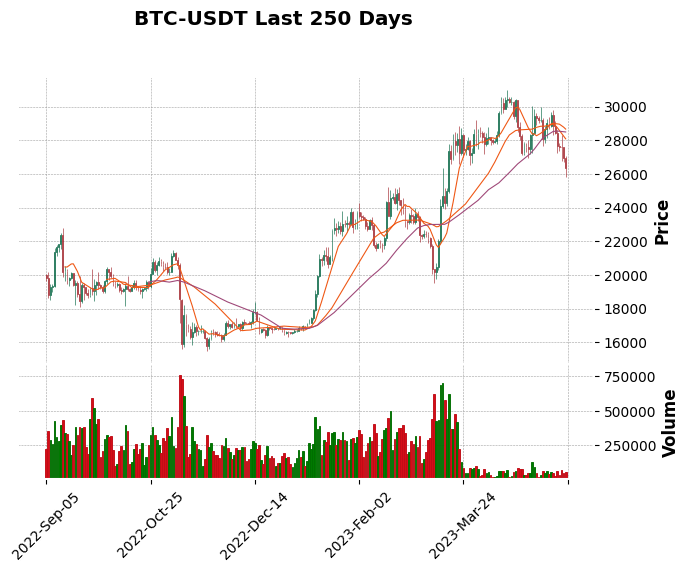

In [24]:
# Plotting of the data:
# Prices, volumes & Moving averages for the last 250 days
mpf.plot(BTC_historical_df.set_index('Close Time').tail(250), 
        type='candle', style='charles', 
        volume=True, 
        title='BTC-USDT Last 250 Days', 
        mav=(10,30,50))